In [1]:
import scipy.io
import urllib.request
import dgl
import math
import random
import time
import copy
import joblib
import os, sys
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import dgl.function as fn
import matplotlib.pyplot as plt
from HGTDGL.model import *
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from utils import split_data, evaluate_auc, evaluate_acc, search_first_catch
from transfer_func import no_transfer, transfer

0
LR: 0.00004, Train-Loss: 0.7215, Eval-Loss: 0.7220, Test-Loss: 0.7219, Train-ACC: 0.4954, Eval-ACC: 0.5006, Test-ACC: 0.5028, Best-Eval-ACC: 0.5006, Best-Test-ACC: 0.5028
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5006, Best-Test-ACC: 0.5028
LR: 0.00081, Train-Loss: 0.6418, Eval-Loss: 0.6403, Test-Loss: 0.6385, Train-ACC: 0.7085, Eval-ACC: 0.6812, Test-ACC: 0.6924, Best-Eval-ACC: 0.7022, Best-Test-ACC: 0.7002
LR: 0.00057, Train-Loss: 0.6009, Eval-Loss: 0.6066, Test-Loss: 0.6066, Train-ACC: 0.7989, Eval-ACC: 0.7843, Test-ACC: 0.7868, Best-Eval-ACC: 0.7859, Best-Test-ACC: 0.7847
LR: 0.00031, Train-Loss: 0.5889, Eval-Loss: 0.6009, Test-Loss: 0.5976, Train-ACC: 0.8247, Eval-ACC: 0.7985, Test-ACC: 0.8094, Best-Eval-ACC: 0.8033, Best-Test-ACC: 0.8072
LR: 0.00010, Train-Loss: 0.5838, Eval-Loss: 0.5983, Test-Loss: 0.5948, Train-ACC: 0.8283, Eval-ACC: 0.7996, Test-ACC: 0.8093, Best-Eval-ACC: 0.

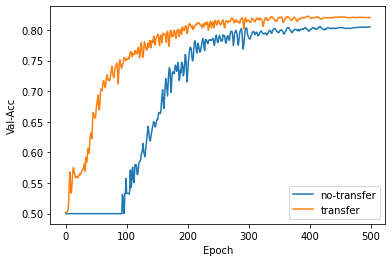

1
LR: 0.00004, Train-Loss: 0.7240, Eval-Loss: 0.7234, Test-Loss: 0.7234, Train-ACC: 0.5109, Eval-ACC: 0.5279, Test-ACC: 0.5321, Best-Eval-ACC: 0.5279, Best-Test-ACC: 0.5321
LR: 0.00096, Train-Loss: 0.6822, Eval-Loss: 0.6835, Test-Loss: 0.6833, Train-ACC: 0.5417, Eval-ACC: 0.5371, Test-ACC: 0.5385, Best-Eval-ACC: 0.5628, Best-Test-ACC: 0.5624
LR: 0.00081, Train-Loss: 0.6328, Eval-Loss: 0.6334, Test-Loss: 0.6368, Train-ACC: 0.7041, Eval-ACC: 0.6998, Test-ACC: 0.6889, Best-Eval-ACC: 0.7212, Best-Test-ACC: 0.7119
LR: 0.00057, Train-Loss: 0.5953, Eval-Loss: 0.6031, Test-Loss: 0.6049, Train-ACC: 0.8135, Eval-ACC: 0.7997, Test-ACC: 0.7973, Best-Eval-ACC: 0.8007, Best-Test-ACC: 0.7950
LR: 0.00031, Train-Loss: 0.5846, Eval-Loss: 0.5975, Test-Loss: 0.5982, Train-ACC: 0.8319, Eval-ACC: 0.8076, Test-ACC: 0.8079, Best-Eval-ACC: 0.8115, Best-Test-ACC: 0.8050
LR: 0.00010, Train-Loss: 0.5804, Eval-Loss: 0.5958, Test-Loss: 0.5959, Train-ACC: 0.8405, Eval-ACC: 0.8123, Test-ACC: 0.8138, Best-Eval-ACC: 0.

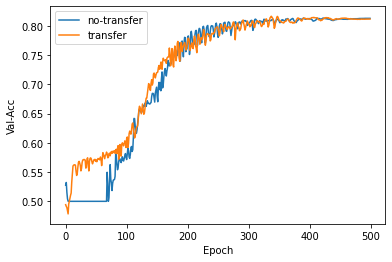

2
LR: 0.00004, Train-Loss: 0.7246, Eval-Loss: 0.7243, Test-Loss: 0.7244, Train-ACC: 0.5095, Eval-ACC: 0.5114, Test-ACC: 0.5059, Best-Eval-ACC: 0.5114, Best-Test-ACC: 0.5059
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5209, Best-Test-ACC: 0.5081
LR: 0.00081, Train-Loss: 0.6292, Eval-Loss: 0.6276, Test-Loss: 0.6285, Train-ACC: 0.7273, Eval-ACC: 0.7315, Test-ACC: 0.7312, Best-Eval-ACC: 0.7315, Best-Test-ACC: 0.7312
LR: 0.00057, Train-Loss: 0.5950, Eval-Loss: 0.6008, Test-Loss: 0.6046, Train-ACC: 0.7938, Eval-ACC: 0.7966, Test-ACC: 0.7890, Best-Eval-ACC: 0.8015, Best-Test-ACC: 0.7920
LR: 0.00031, Train-Loss: 0.5810, Eval-Loss: 0.5957, Test-Loss: 0.5976, Train-ACC: 0.8397, Eval-ACC: 0.8045, Test-ACC: 0.8013, Best-Eval-ACC: 0.8120, Best-Test-ACC: 0.8056
LR: 0.00010, Train-Loss: 0.5772, Eval-Loss: 0.5950, Test-Loss: 0.5973, Train-ACC: 0.8442, Eval-ACC: 0.8082, Test-ACC: 0.8064, Best-Eval-ACC: 0.

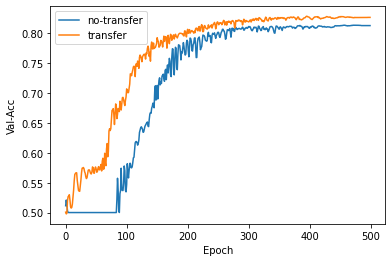

3
LR: 0.00004, Train-Loss: 0.7246, Eval-Loss: 0.7242, Test-Loss: 0.7242, Train-ACC: 0.5017, Eval-ACC: 0.5052, Test-ACC: 0.5036, Best-Eval-ACC: 0.5052, Best-Test-ACC: 0.5036
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5123, Best-Test-ACC: 0.5106
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5123, Best-Test-ACC: 0.5106
LR: 0.00057, Train-Loss: 0.6689, Eval-Loss: 0.6695, Test-Loss: 0.6710, Train-ACC: 0.5766, Eval-ACC: 0.5733, Test-ACC: 0.5701, Best-Eval-ACC: 0.5839, Best-Test-ACC: 0.5774
LR: 0.00031, Train-Loss: 0.6326, Eval-Loss: 0.6335, Test-Loss: 0.6375, Train-ACC: 0.6997, Eval-ACC: 0.7113, Test-ACC: 0.7026, Best-Eval-ACC: 0.7113, Best-Test-ACC: 0.7026
LR: 0.00010, Train-Loss: 0.6088, Eval-Loss: 0.6149, Test-Loss: 0.6169, Train-ACC: 0.7730, Eval-ACC: 0.7621, Test-ACC: 0.7575, Best-Eval-ACC: 0.

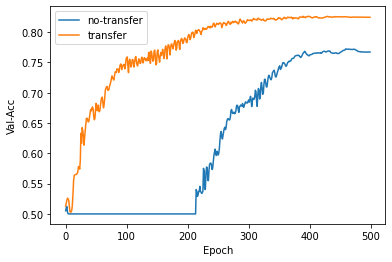

4
LR: 0.00004, Train-Loss: 0.7276, Eval-Loss: 0.7280, Test-Loss: 0.7280, Train-ACC: 0.5014, Eval-ACC: 0.4995, Test-ACC: 0.4998, Best-Eval-ACC: 0.4995, Best-Test-ACC: 0.4998
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5111, Best-Test-ACC: 0.5072
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5111, Best-Test-ACC: 0.5072
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5111, Best-Test-ACC: 0.5072
LR: 0.00031, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5111, Best-Test-ACC: 0.5072
LR: 0.00010, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.

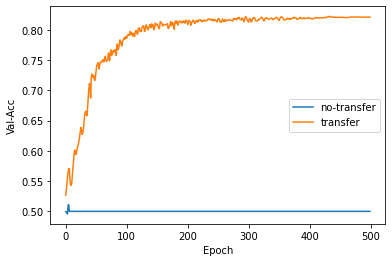

NO TRANSFER -- Total Time: 518.2883 +/- 6.9958, Best Model Time: 360.2057 +/- 178.4989, Best Val Acc: 0.7431 +/- 0.1170, Best Test Acc: 0.7416 +/- 0.1185
TRANSFER -- Total Time: 520.7109 +/- 8.2991, Best Model Time: 408.7318 +/- 30.5463, Best Val Acc: 0.8232 +/- 0.0041, Best Test Acc: 0.8172 +/- 0.0077
The number of times No-Transfer is better than Transfer:  0
NO TRANSFER -- Best Time: 360.2057 +/- 178.4989, TRANSFER -- Best Time: 193.2118 +/- 116.3173


In [2]:
n = 5
best_time_list_no_transfer = []
total_time_list_no_transfer = []
best_eval_acc_list_no_transfer = []
best_test_acc_list_no_transfer = []

best_time_list_transfer = []
total_time_list_transfer = []
best_eval_acc_list_transfer = []
best_test_acc_list_transfer = []

cnt_no_transfer_better = 0
best_time_list_transfer_better = []
time_list_transfer_catch_no_transfer = []

target1 = 3341
target2 = 1

for i in range(n):
    print(i)
    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list,\
    train_data_output, eval_data_output, test_data_output, used_data_output = no_transfer(target1)
    print('---------------')
    best_time_list_no_transfer.append(best_model_training_time)
    total_time_list_no_transfer.append(total_training_time)
    best_eval_acc_list_no_transfer.append(best_eval_acc)
    best_test_acc_list_no_transfer.append(best_test_acc)
    eval_acc_list_no_transfer = eval_acc_list
    
    tmp_time = best_model_training_time
    tmp_val_acc = best_eval_acc

    best_model, _, _, _, _, _, _, _, _, _, _, _, _ = no_transfer(target2)
    print('---------------')   

    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list\
    = transfer(target1, best_model, train_data_output, eval_data_output, test_data_output, used_data_output)
    print('---------------')

    best_time_list_transfer.append(best_model_training_time)
    total_time_list_transfer.append(total_training_time)
    best_eval_acc_list_transfer.append(best_eval_acc)
    best_test_acc_list_transfer.append(best_test_acc)
    eval_acc_list_transfer = eval_acc_list
    
    epoches = list(range(500))
    plt.plot(epoches, eval_acc_list_no_transfer, label='no-transfer')
    plt.plot(epoches, eval_acc_list_transfer, label='transfer')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Val-Acc')
    plt.show()
    
    first_catch_idx = search_first_catch(tmp_val_acc, eval_acc_list_transfer)
    if first_catch_idx != -1:
        best_time_list_transfer_better.append(tmp_time)
        time_list_transfer_catch_no_transfer.append(time_list[first_catch_idx])
    else:
        cnt_no_transfer_better += 1

best_time_no_transfer_avg = np.mean(best_time_list_no_transfer)
best_time_no_transfer_std = np.std(best_time_list_no_transfer)
total_time_no_transfer_avg = np.mean(total_time_list_no_transfer)
total_time_no_transfer_std = np.std(total_time_list_no_transfer)
best_eval_acc_no_transfer_avg = np.mean(best_eval_acc_list_no_transfer)
best_eval_acc_no_transfer_std = np.std(best_eval_acc_list_no_transfer)
best_test_acc_no_transfer_avg = np.mean(best_test_acc_list_no_transfer)
best_test_acc_no_transfer_std = np.std(best_test_acc_list_no_transfer)

best_time_transfer_avg = np.mean(best_time_list_transfer)
best_time_transfer_std = np.std(best_time_list_transfer)
total_time_transfer_avg = np.mean(total_time_list_transfer)
total_time_transfer_std = np.std(total_time_list_transfer)
best_eval_acc_transfer_avg = np.mean(best_eval_acc_list_transfer)
best_eval_acc_transfer_std = np.std(best_eval_acc_list_transfer)
best_test_acc_transfer_avg = np.mean(best_test_acc_list_transfer)
best_test_acc_transfer_std = np.std(best_test_acc_list_transfer)

print('NO TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_no_transfer_avg, 
    total_time_no_transfer_std, 
    best_time_no_transfer_avg,
    best_time_no_transfer_std, 
    best_eval_acc_no_transfer_avg, 
    best_eval_acc_no_transfer_std, 
    best_test_acc_no_transfer_avg, 
    best_test_acc_no_transfer_std, 
))

print('TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_transfer_avg, 
    total_time_transfer_std, 
    best_time_transfer_avg,
    best_time_transfer_std, 
    best_eval_acc_transfer_avg, 
    best_eval_acc_transfer_std, 
    best_test_acc_transfer_avg, 
    best_test_acc_transfer_std, 
))

best_time_list_transfer_better_avg = np.mean(best_time_list_transfer_better)
best_time_list_transfer_better_std = np.std(best_time_list_transfer_better)
time_list_transfer_catch_no_transfer_avg = np.mean(time_list_transfer_catch_no_transfer)
time_list_transfer_catch_no_transfer_std = np.std(time_list_transfer_catch_no_transfer)

print('The number of times No-Transfer is better than Transfer: ', cnt_no_transfer_better)
print('NO TRANSFER -- Best Time: %.4f +/- %.4f, TRANSFER -- Best Time: %.4f +/- %.4f' % (
    best_time_list_transfer_better_avg,
    best_time_list_transfer_better_std,
    time_list_transfer_catch_no_transfer_avg,
    time_list_transfer_catch_no_transfer_std,
))

0
LR: 0.00004, Train-Loss: 0.7277, Eval-Loss: 0.7282, Test-Loss: 0.7284, Train-ACC: 0.4953, Eval-ACC: 0.4942, Test-ACC: 0.4923, Best-Eval-ACC: 0.4942, Best-Test-ACC: 0.4923
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5073, Best-Test-ACC: 0.5102
LR: 0.00081, Train-Loss: 0.6375, Eval-Loss: 0.6390, Test-Loss: 0.6405, Train-ACC: 0.6845, Eval-ACC: 0.6849, Test-ACC: 0.6834, Best-Eval-ACC: 0.6991, Best-Test-ACC: 0.6999
LR: 0.00057, Train-Loss: 0.5878, Eval-Loss: 0.6015, Test-Loss: 0.6014, Train-ACC: 0.8237, Eval-ACC: 0.8074, Test-ACC: 0.8032, Best-Eval-ACC: 0.8074, Best-Test-ACC: 0.8032
LR: 0.00031, Train-Loss: 0.5733, Eval-Loss: 0.5882, Test-Loss: 0.5893, Train-ACC: 0.8666, Eval-ACC: 0.8341, Test-ACC: 0.8278, Best-Eval-ACC: 0.8379, Best-Test-ACC: 0.8283
LR: 0.00010, Train-Loss: 0.5641, Eval-Loss: 0.5848, Test-Loss: 0.5872, Train-ACC: 0.8831, Eval-ACC: 0.8458, Test-ACC: 0.8385, Best-Eval-ACC: 0.

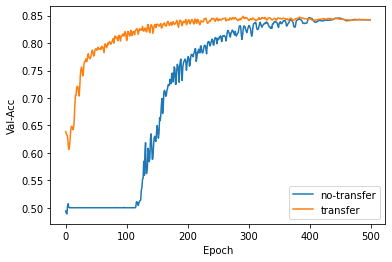

1
LR: 0.00004, Train-Loss: 0.7215, Eval-Loss: 0.7210, Test-Loss: 0.7210, Train-ACC: 0.5010, Eval-ACC: 0.5278, Test-ACC: 0.5267, Best-Eval-ACC: 0.5278, Best-Test-ACC: 0.5267
LR: 0.00096, Train-Loss: 0.6923, Eval-Loss: 0.6924, Test-Loss: 0.6924, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5278, Best-Test-ACC: 0.5267
LR: 0.00081, Train-Loss: 0.6045, Eval-Loss: 0.6104, Test-Loss: 0.6123, Train-ACC: 0.7739, Eval-ACC: 0.7746, Test-ACC: 0.7725, Best-Eval-ACC: 0.7750, Best-Test-ACC: 0.7713
LR: 0.00057, Train-Loss: 0.5737, Eval-Loss: 0.5907, Test-Loss: 0.5919, Train-ACC: 0.8548, Eval-ACC: 0.8184, Test-ACC: 0.8187, Best-Eval-ACC: 0.8247, Best-Test-ACC: 0.8241
LR: 0.00031, Train-Loss: 0.5621, Eval-Loss: 0.5868, Test-Loss: 0.5894, Train-ACC: 0.8838, Eval-ACC: 0.8293, Test-ACC: 0.8220, Best-Eval-ACC: 0.8376, Best-Test-ACC: 0.8314
LR: 0.00010, Train-Loss: 0.5592, Eval-Loss: 0.5860, Test-Loss: 0.5876, Train-ACC: 0.8879, Eval-ACC: 0.8364, Test-ACC: 0.8326, Best-Eval-ACC: 0.

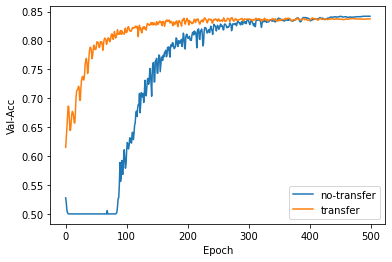

2
LR: 0.00004, Train-Loss: 0.7181, Eval-Loss: 0.7167, Test-Loss: 0.7167, Train-ACC: 0.5011, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00081, Train-Loss: 0.6680, Eval-Loss: 0.6665, Test-Loss: 0.6712, Train-ACC: 0.6014, Eval-ACC: 0.6064, Test-ACC: 0.5933, Best-Eval-ACC: 0.6085, Best-Test-ACC: 0.6014
LR: 0.00057, Train-Loss: 0.6004, Eval-Loss: 0.6125, Test-Loss: 0.6164, Train-ACC: 0.7917, Eval-ACC: 0.7552, Test-ACC: 0.7444, Best-Eval-ACC: 0.7813, Best-Test-ACC: 0.7631
LR: 0.00031, Train-Loss: 0.5814, Eval-Loss: 0.5966, Test-Loss: 0.6031, Train-ACC: 0.8389, Eval-ACC: 0.8105, Test-ACC: 0.8007, Best-Eval-ACC: 0.8116, Best-Test-ACC: 0.7982
LR: 0.00010, Train-Loss: 0.5741, Eval-Loss: 0.5930, Test-Loss: 0.5974, Train-ACC: 0.8480, Eval-ACC: 0.8105, Test-ACC: 0.8034, Best-Eval-ACC: 0.

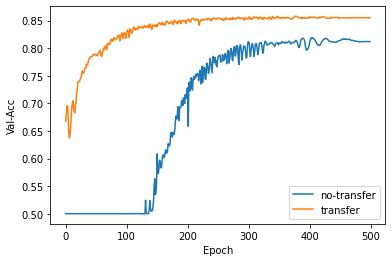

3
LR: 0.00004, Train-Loss: 0.7222, Eval-Loss: 0.7203, Test-Loss: 0.7203, Train-ACC: 0.4919, Eval-ACC: 0.5063, Test-ACC: 0.5042, Best-Eval-ACC: 0.5063, Best-Test-ACC: 0.5042
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5063, Best-Test-ACC: 0.5042
LR: 0.00081, Train-Loss: 0.6919, Eval-Loss: 0.6926, Test-Loss: 0.6923, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5063, Best-Test-ACC: 0.5042
LR: 0.00057, Train-Loss: 0.6245, Eval-Loss: 0.6309, Test-Loss: 0.6269, Train-ACC: 0.7390, Eval-ACC: 0.7187, Test-ACC: 0.7270, Best-Eval-ACC: 0.7264, Best-Test-ACC: 0.7346
LR: 0.00031, Train-Loss: 0.5897, Eval-Loss: 0.6062, Test-Loss: 0.6077, Train-ACC: 0.8107, Eval-ACC: 0.7892, Test-ACC: 0.7863, Best-Eval-ACC: 0.7892, Best-Test-ACC: 0.7863
LR: 0.00010, Train-Loss: 0.5765, Eval-Loss: 0.5979, Test-Loss: 0.5983, Train-ACC: 0.8427, Eval-ACC: 0.7986, Test-ACC: 0.8026, Best-Eval-ACC: 0.

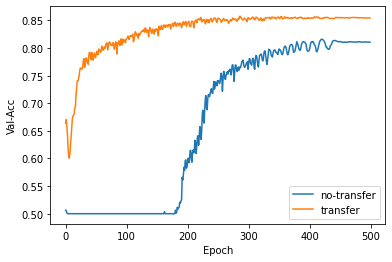

4
LR: 0.00004, Train-Loss: 0.7220, Eval-Loss: 0.7199, Test-Loss: 0.7199, Train-ACC: 0.5047, Eval-ACC: 0.5035, Test-ACC: 0.5052, Best-Eval-ACC: 0.5035, Best-Test-ACC: 0.5052
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5035, Best-Test-ACC: 0.5052
LR: 0.00081, Train-Loss: 0.6476, Eval-Loss: 0.6459, Test-Loss: 0.6519, Train-ACC: 0.6686, Eval-ACC: 0.6978, Test-ACC: 0.6893, Best-Eval-ACC: 0.6978, Best-Test-ACC: 0.6893
LR: 0.00057, Train-Loss: 0.5882, Eval-Loss: 0.5980, Test-Loss: 0.5994, Train-ACC: 0.8303, Eval-ACC: 0.8168, Test-ACC: 0.8143, Best-Eval-ACC: 0.8168, Best-Test-ACC: 0.8143
LR: 0.00031, Train-Loss: 0.5696, Eval-Loss: 0.5869, Test-Loss: 0.5897, Train-ACC: 0.8744, Eval-ACC: 0.8395, Test-ACC: 0.8308, Best-Eval-ACC: 0.8406, Best-Test-ACC: 0.8349
LR: 0.00010, Train-Loss: 0.5620, Eval-Loss: 0.5830, Test-Loss: 0.5854, Train-ACC: 0.8822, Eval-ACC: 0.8439, Test-ACC: 0.8399, Best-Eval-ACC: 0.

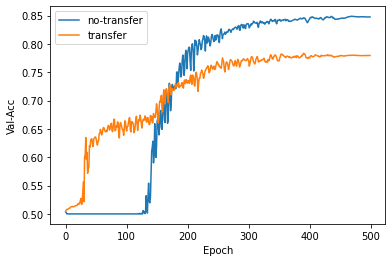

NO TRANSFER -- Total Time: 624.3952 +/- 18.3433, Best Model Time: 534.6547 +/- 23.1793, Best Val Acc: 0.8345 +/- 0.0140, Best Test Acc: 0.8270 +/- 0.0149
TRANSFER -- Total Time: 612.7162 +/- 18.1777, Best Model Time: 389.0732 +/- 51.5024, Best Val Acc: 0.8375 +/- 0.0278, Best Test Acc: 0.8339 +/- 0.0234
The number of times No-Transfer is better than Transfer:  2
NO TRANSFER -- Best Time: 516.7309 +/- 6.2933, TRANSFER -- Best Time: 196.4167 +/- 126.4667


In [2]:
n = 5
best_time_list_no_transfer = []
total_time_list_no_transfer = []
best_eval_acc_list_no_transfer = []
best_test_acc_list_no_transfer = []

best_time_list_transfer = []
total_time_list_transfer = []
best_eval_acc_list_transfer = []
best_test_acc_list_transfer = []

cnt_no_transfer_better = 0
best_time_list_transfer_better = []
time_list_transfer_catch_no_transfer = []

target1 = 2571
target2 = 2957

for i in range(n):
    print(i)
    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list,\
    train_data_output, eval_data_output, test_data_output, used_data_output = no_transfer(target1)
    print('---------------')
    best_time_list_no_transfer.append(best_model_training_time)
    total_time_list_no_transfer.append(total_training_time)
    best_eval_acc_list_no_transfer.append(best_eval_acc)
    best_test_acc_list_no_transfer.append(best_test_acc)
    eval_acc_list_no_transfer = eval_acc_list
    
    tmp_time = best_model_training_time
    tmp_val_acc = best_eval_acc

    best_model, _, _, _, _, _, _, _, _, _, _, _, _ = no_transfer(target2)
    print('---------------')   

    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list\
    = transfer(target1, best_model, train_data_output, eval_data_output, test_data_output, used_data_output)
    print('---------------')

    best_time_list_transfer.append(best_model_training_time)
    total_time_list_transfer.append(total_training_time)
    best_eval_acc_list_transfer.append(best_eval_acc)
    best_test_acc_list_transfer.append(best_test_acc)
    eval_acc_list_transfer = eval_acc_list
    
    epoches = list(range(500))
    plt.plot(epoches, eval_acc_list_no_transfer, label='no-transfer')
    plt.plot(epoches, eval_acc_list_transfer, label='transfer')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Val-Acc')
    plt.show()
    
    first_catch_idx = search_first_catch(tmp_val_acc, eval_acc_list_transfer)
    if first_catch_idx != -1:
        best_time_list_transfer_better.append(tmp_time)
        time_list_transfer_catch_no_transfer.append(time_list[first_catch_idx])
    else:
        cnt_no_transfer_better += 1

best_time_no_transfer_avg = np.mean(best_time_list_no_transfer)
best_time_no_transfer_std = np.std(best_time_list_no_transfer)
total_time_no_transfer_avg = np.mean(total_time_list_no_transfer)
total_time_no_transfer_std = np.std(total_time_list_no_transfer)
best_eval_acc_no_transfer_avg = np.mean(best_eval_acc_list_no_transfer)
best_eval_acc_no_transfer_std = np.std(best_eval_acc_list_no_transfer)
best_test_acc_no_transfer_avg = np.mean(best_test_acc_list_no_transfer)
best_test_acc_no_transfer_std = np.std(best_test_acc_list_no_transfer)

best_time_transfer_avg = np.mean(best_time_list_transfer)
best_time_transfer_std = np.std(best_time_list_transfer)
total_time_transfer_avg = np.mean(total_time_list_transfer)
total_time_transfer_std = np.std(total_time_list_transfer)
best_eval_acc_transfer_avg = np.mean(best_eval_acc_list_transfer)
best_eval_acc_transfer_std = np.std(best_eval_acc_list_transfer)
best_test_acc_transfer_avg = np.mean(best_test_acc_list_transfer)
best_test_acc_transfer_std = np.std(best_test_acc_list_transfer)

print('NO TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_no_transfer_avg, 
    total_time_no_transfer_std, 
    best_time_no_transfer_avg,
    best_time_no_transfer_std, 
    best_eval_acc_no_transfer_avg, 
    best_eval_acc_no_transfer_std, 
    best_test_acc_no_transfer_avg, 
    best_test_acc_no_transfer_std, 
))

print('TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_transfer_avg, 
    total_time_transfer_std, 
    best_time_transfer_avg,
    best_time_transfer_std, 
    best_eval_acc_transfer_avg, 
    best_eval_acc_transfer_std, 
    best_test_acc_transfer_avg, 
    best_test_acc_transfer_std, 
))

best_time_list_transfer_better_avg = np.mean(best_time_list_transfer_better)
best_time_list_transfer_better_std = np.std(best_time_list_transfer_better)
time_list_transfer_catch_no_transfer_avg = np.mean(time_list_transfer_catch_no_transfer)
time_list_transfer_catch_no_transfer_std = np.std(time_list_transfer_catch_no_transfer)

print('The number of times No-Transfer is better than Transfer: ', cnt_no_transfer_better)
print('NO TRANSFER -- Best Time: %.4f +/- %.4f, TRANSFER -- Best Time: %.4f +/- %.4f' % (
    best_time_list_transfer_better_avg,
    best_time_list_transfer_better_std,
    time_list_transfer_catch_no_transfer_avg,
    time_list_transfer_catch_no_transfer_std,
))

0
LR: 0.00004, Train-Loss: 0.7273, Eval-Loss: 0.7266, Test-Loss: 0.7265, Train-ACC: 0.4968, Eval-ACC: 0.4925, Test-ACC: 0.4947, Best-Eval-ACC: 0.4925, Best-Test-ACC: 0.4947
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5072, Best-Test-ACC: 0.5085
LR: 0.00081, Train-Loss: 0.6795, Eval-Loss: 0.6811, Test-Loss: 0.6795, Train-ACC: 0.5608, Eval-ACC: 0.5579, Test-ACC: 0.5608, Best-Eval-ACC: 0.5607, Best-Test-ACC: 0.5641
LR: 0.00057, Train-Loss: 0.6425, Eval-Loss: 0.6439, Test-Loss: 0.6424, Train-ACC: 0.6830, Eval-ACC: 0.6812, Test-ACC: 0.6829, Best-Eval-ACC: 0.6812, Best-Test-ACC: 0.6829
LR: 0.00031, Train-Loss: 0.6068, Eval-Loss: 0.6100, Test-Loss: 0.6081, Train-ACC: 0.7879, Eval-ACC: 0.7828, Test-ACC: 0.7870, Best-Eval-ACC: 0.7835, Best-Test-ACC: 0.7857
LR: 0.00010, Train-Loss: 0.5988, Eval-Loss: 0.6021, Test-Loss: 0.6011, Train-ACC: 0.8086, Eval-ACC: 0.8029, Test-ACC: 0.8066, Best-Eval-ACC: 0.

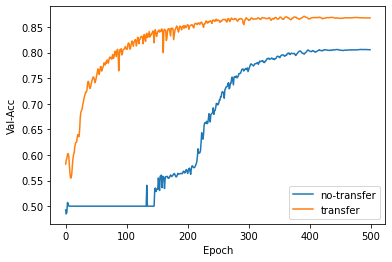

1
LR: 0.00004, Train-Loss: 0.7162, Eval-Loss: 0.7154, Test-Loss: 0.7154, Train-ACC: 0.5005, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5326, Best-Test-ACC: 0.5398
LR: 0.00081, Train-Loss: 0.6576, Eval-Loss: 0.6555, Test-Loss: 0.6577, Train-ACC: 0.6358, Eval-ACC: 0.6578, Test-ACC: 0.6532, Best-Eval-ACC: 0.6578, Best-Test-ACC: 0.6532
LR: 0.00057, Train-Loss: 0.6099, Eval-Loss: 0.6116, Test-Loss: 0.6117, Train-ACC: 0.7669, Eval-ACC: 0.7795, Test-ACC: 0.7788, Best-Eval-ACC: 0.7854, Best-Test-ACC: 0.7884
LR: 0.00031, Train-Loss: 0.5956, Eval-Loss: 0.5970, Test-Loss: 0.5965, Train-ACC: 0.8140, Eval-ACC: 0.8162, Test-ACC: 0.8165, Best-Eval-ACC: 0.8166, Best-Test-ACC: 0.8158
LR: 0.00010, Train-Loss: 0.5914, Eval-Loss: 0.5958, Test-Loss: 0.5953, Train-ACC: 0.8270, Eval-ACC: 0.8208, Test-ACC: 0.8205, Best-Eval-ACC: 0.

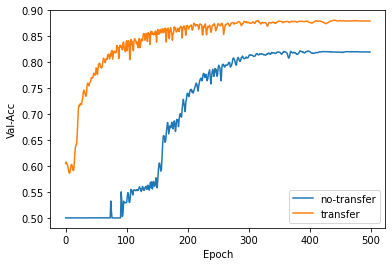

2
LR: 0.00004, Train-Loss: 0.7248, Eval-Loss: 0.7242, Test-Loss: 0.7243, Train-ACC: 0.5099, Eval-ACC: 0.5221, Test-ACC: 0.5199, Best-Eval-ACC: 0.5221, Best-Test-ACC: 0.5199
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5450, Best-Test-ACC: 0.5336
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5450, Best-Test-ACC: 0.5336
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5450, Best-Test-ACC: 0.5336
LR: 0.00031, Train-Loss: 0.6618, Eval-Loss: 0.6590, Test-Loss: 0.6635, Train-ACC: 0.6071, Eval-ACC: 0.6116, Test-ACC: 0.6044, Best-Eval-ACC: 0.6322, Best-Test-ACC: 0.6230
LR: 0.00010, Train-Loss: 0.6139, Eval-Loss: 0.6134, Test-Loss: 0.6151, Train-ACC: 0.7701, Eval-ACC: 0.7639, Test-ACC: 0.7641, Best-Eval-ACC: 0.

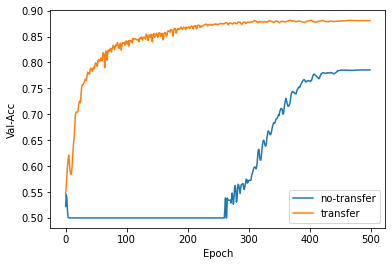

3
LR: 0.00004, Train-Loss: 0.7180, Eval-Loss: 0.7167, Test-Loss: 0.7168, Train-ACC: 0.5016, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6929, Eval-Loss: 0.6925, Test-Loss: 0.6925, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00081, Train-Loss: 0.6401, Eval-Loss: 0.6386, Test-Loss: 0.6396, Train-ACC: 0.6876, Eval-ACC: 0.7031, Test-ACC: 0.7072, Best-Eval-ACC: 0.7031, Best-Test-ACC: 0.7072
LR: 0.00057, Train-Loss: 0.5960, Eval-Loss: 0.5995, Test-Loss: 0.6020, Train-ACC: 0.8026, Eval-ACC: 0.8096, Test-ACC: 0.8034, Best-Eval-ACC: 0.8096, Best-Test-ACC: 0.8034
LR: 0.00031, Train-Loss: 0.5810, Eval-Loss: 0.5847, Test-Loss: 0.5868, Train-ACC: 0.8389, Eval-ACC: 0.8288, Test-ACC: 0.8257, Best-Eval-ACC: 0.8388, Best-Test-ACC: 0.8345
LR: 0.00010, Train-Loss: 0.5750, Eval-Loss: 0.5798, Test-Loss: 0.5831, Train-ACC: 0.8547, Eval-ACC: 0.8497, Test-ACC: 0.8435, Best-Eval-ACC: 0.

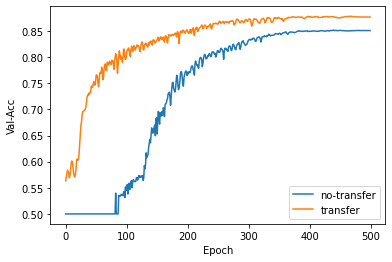

4
LR: 0.00004, Train-Loss: 0.7213, Eval-Loss: 0.7208, Test-Loss: 0.7208, Train-ACC: 0.5037, Eval-ACC: 0.5033, Test-ACC: 0.5041, Best-Eval-ACC: 0.5033, Best-Test-ACC: 0.5041
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5033, Best-Test-ACC: 0.5041
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5033, Best-Test-ACC: 0.5041
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5033, Best-Test-ACC: 0.5041
LR: 0.00031, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5033, Best-Test-ACC: 0.5041
LR: 0.00010, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.

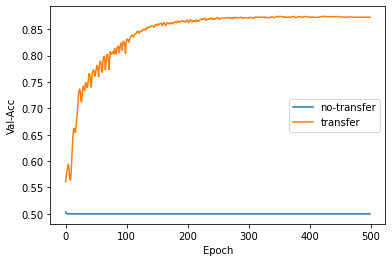

NO TRANSFER -- Total Time: 640.6772 +/- 17.0987, Best Model Time: 443.3451 +/- 224.5414, Best Val Acc: 0.7538 +/- 0.1271, Best Test Acc: 0.7521 +/- 0.1255
TRANSFER -- Total Time: 632.2914 +/- 8.1697, Best Model Time: 509.5057 +/- 55.8116, Best Val Acc: 0.8773 +/- 0.0040, Best Test Acc: 0.8724 +/- 0.0036
The number of times No-Transfer is better than Transfer:  0
NO TRANSFER -- Best Time: 443.3451 +/- 224.5414, TRANSFER -- Best Time: 99.2408 +/- 78.9657


In [3]:
n = 5
best_time_list_no_transfer = []
total_time_list_no_transfer = []
best_eval_acc_list_no_transfer = []
best_test_acc_list_no_transfer = []

best_time_list_transfer = []
total_time_list_transfer = []
best_eval_acc_list_transfer = []
best_test_acc_list_transfer = []

cnt_no_transfer_better = 0
best_time_list_transfer_better = []
time_list_transfer_catch_no_transfer = []

target1 = 1227
target2 = 108

for i in range(n):
    print(i)
    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list,\
    train_data_output, eval_data_output, test_data_output, used_data_output = no_transfer(target1)
    print('---------------')
    best_time_list_no_transfer.append(best_model_training_time)
    total_time_list_no_transfer.append(total_training_time)
    best_eval_acc_list_no_transfer.append(best_eval_acc)
    best_test_acc_list_no_transfer.append(best_test_acc)
    eval_acc_list_no_transfer = eval_acc_list
    
    tmp_time = best_model_training_time
    tmp_val_acc = best_eval_acc

    best_model, _, _, _, _, _, _, _, _, _, _, _, _ = no_transfer(target2)
    print('---------------')   

    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list\
    = transfer(target1, best_model, train_data_output, eval_data_output, test_data_output, used_data_output)
    print('---------------')

    best_time_list_transfer.append(best_model_training_time)
    total_time_list_transfer.append(total_training_time)
    best_eval_acc_list_transfer.append(best_eval_acc)
    best_test_acc_list_transfer.append(best_test_acc)
    eval_acc_list_transfer = eval_acc_list
    
    epoches = list(range(500))
    plt.plot(epoches, eval_acc_list_no_transfer, label='no-transfer')
    plt.plot(epoches, eval_acc_list_transfer, label='transfer')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Val-Acc')
    plt.show()
    
    first_catch_idx = search_first_catch(tmp_val_acc, eval_acc_list_transfer)
    if first_catch_idx != -1:
        best_time_list_transfer_better.append(tmp_time)
        time_list_transfer_catch_no_transfer.append(time_list[first_catch_idx])
    else:
        cnt_no_transfer_better += 1

best_time_no_transfer_avg = np.mean(best_time_list_no_transfer)
best_time_no_transfer_std = np.std(best_time_list_no_transfer)
total_time_no_transfer_avg = np.mean(total_time_list_no_transfer)
total_time_no_transfer_std = np.std(total_time_list_no_transfer)
best_eval_acc_no_transfer_avg = np.mean(best_eval_acc_list_no_transfer)
best_eval_acc_no_transfer_std = np.std(best_eval_acc_list_no_transfer)
best_test_acc_no_transfer_avg = np.mean(best_test_acc_list_no_transfer)
best_test_acc_no_transfer_std = np.std(best_test_acc_list_no_transfer)

best_time_transfer_avg = np.mean(best_time_list_transfer)
best_time_transfer_std = np.std(best_time_list_transfer)
total_time_transfer_avg = np.mean(total_time_list_transfer)
total_time_transfer_std = np.std(total_time_list_transfer)
best_eval_acc_transfer_avg = np.mean(best_eval_acc_list_transfer)
best_eval_acc_transfer_std = np.std(best_eval_acc_list_transfer)
best_test_acc_transfer_avg = np.mean(best_test_acc_list_transfer)
best_test_acc_transfer_std = np.std(best_test_acc_list_transfer)

print('NO TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_no_transfer_avg, 
    total_time_no_transfer_std, 
    best_time_no_transfer_avg,
    best_time_no_transfer_std, 
    best_eval_acc_no_transfer_avg, 
    best_eval_acc_no_transfer_std, 
    best_test_acc_no_transfer_avg, 
    best_test_acc_no_transfer_std, 
))

print('TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_transfer_avg, 
    total_time_transfer_std, 
    best_time_transfer_avg,
    best_time_transfer_std, 
    best_eval_acc_transfer_avg, 
    best_eval_acc_transfer_std, 
    best_test_acc_transfer_avg, 
    best_test_acc_transfer_std, 
))

best_time_list_transfer_better_avg = np.mean(best_time_list_transfer_better)
best_time_list_transfer_better_std = np.std(best_time_list_transfer_better)
time_list_transfer_catch_no_transfer_avg = np.mean(time_list_transfer_catch_no_transfer)
time_list_transfer_catch_no_transfer_std = np.std(time_list_transfer_catch_no_transfer)

print('The number of times No-Transfer is better than Transfer: ', cnt_no_transfer_better)
print('NO TRANSFER -- Best Time: %.4f +/- %.4f, TRANSFER -- Best Time: %.4f +/- %.4f' % (
    best_time_list_transfer_better_avg,
    best_time_list_transfer_better_std,
    time_list_transfer_catch_no_transfer_avg,
    time_list_transfer_catch_no_transfer_std,
))